In [1]:
import os
import gensim#from gensim.models import word2vec
import math
import random
import numpy as np
from numpy import linalg as la
import datetime
import time
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
random.seed?

In [4]:
random.sample(set([1,2,3,4,5]), 2)

[2, 5]

In [5]:
filter(lambda x: x % 2 == 1, [1,2,3,4,5])

[1, 3, 5]

In [13]:

def extract_data_from_file_and_generate_train_set_with_specified_M_and_R(filename, num_of_movies, num_of_rates, delimiter):
    train = None
    data = []
    movie_id = set()

    with open(filename , 'r') as f:
        for i, line in enumerate(f):
            userId, movieId, rating, timestamp = line.split(delimiter)
            #userId = int(userId)
            #movieId = int(movieId)
            rating = float(rating)
            timestamp = int(timestamp)
            
            movie_id.add(movieId)

            data.append((userId, movieId, rating, timestamp))

    # control number of movies
    movies_selected = random.sample(movie_id, num_of_movies)
    print 'num_of_movies:'
    print 'expected len: %d' % (num_of_movies)
    print 'in fact: %d' % len(movies_selected)
    
    # filter out history records whose movies are not selected
    data = filter(lambda x: x[1] in movies_selected, data) # Careful! Hard-coded number!
    
    # control number of rates
    data = random.sample(data, num_of_rates)
    print 'num_of_rates:'
    print 'expected len: %d' % (num_of_rates)
    print 'in fact: %d' % len(data)
    
    train = {}
    for i, t in enumerate(data):
        userId, movieId, rating, timestamp = t
        if userId not in train:
            train[userId] = []
        train[userId].append((movieId, rating, timestamp))
    
    return train


In [9]:
#data_filename, delimiter, data_set = os.path.sep.join(['ml-100k', 'u.data']), '\t', '100K'
data_filename, delimiter, data_set = os.path.sep.join(['ml-1m', 'ratings.dat']), '::', '1M'
#data_filename, delimiter, data_set = os.path.sep.join(['ml-10M100K', 'ratings.dat']), '::', '10M'


def get_lines(filename):
    cnt = 0
    with open(filename , 'r') as f:
        for cnt, line in enumerate(f):
            pass
    return cnt + 1

total_lines = get_lines(data_filename)
print 'total_lines:', total_lines

K = None
N = None


total_lines: 1000209


In [14]:
num_of_movies = 1000
num_of_rates = 10 * 10000
r = extract_data_from_file_and_generate_train_set_with_specified_M_and_R(data_filename, num_of_movies, num_of_rates, delimiter)
    

num_of_movies:
expected len: 1000
in fact: 1000
num_of_rates:
expected len: 100000
in fact: 100000


In [17]:
r.values()[0]

[('3060', 3.0, 959974376),
 ('1120', 3.0, 956875950),
 ('1747', 4.0, 959974407),
 ('296', 2.0, 956875720),
 ('3108', 4.0, 959974264),
 ('2124', 3.0, 959974504),
 ('1213', 3.0, 956875635),
 ('588', 3.0, 959974349),
 ('3253', 3.0, 959974328),
 ('1265', 4.0, 959974264),
 ('1569', 2.0, 959974560),
 ('3450', 3.0, 959974504)]

In [44]:
l = [[1,2], [3, 4]]
#print [x for x in l]
x = None
print [y for y in x for x in l]
print [y for x in l for y in x]

TypeError: 'NoneType' object is not iterable

In [34]:
[x for x in r.values()[:2]]

[[('3060', 3.0, 959974376),
  ('1120', 3.0, 956875950),
  ('1747', 4.0, 959974407),
  ('296', 2.0, 956875720),
  ('3108', 4.0, 959974264),
  ('2124', 3.0, 959974504),
  ('1213', 3.0, 956875635),
  ('588', 3.0, 959974349),
  ('3253', 3.0, 959974328),
  ('1265', 4.0, 959974264),
  ('1569', 2.0, 959974560),
  ('3450', 3.0, 959974504)],
 [('2829', 1.0, 957756760),
  ('317', 4.0, 956874389),
  ('1641', 3.0, 956873721),
  ('3053', 5.0, 957756905),
  ('2840', 4.0, 957756905),
  ('3253', 3.0, 956873744),
  ('3512', 5.0, 956873163)]]

In [45]:
#[y for y in x for x in r.values()[:2]] # WRONG!
[y for x in r.values()[:2] for y in x]

[('3060', 3.0, 959974376),
 ('1120', 3.0, 956875950),
 ('1747', 4.0, 959974407),
 ('296', 2.0, 956875720),
 ('3108', 4.0, 959974264),
 ('2124', 3.0, 959974504),
 ('1213', 3.0, 956875635),
 ('588', 3.0, 959974349),
 ('3253', 3.0, 959974328),
 ('1265', 4.0, 959974264),
 ('1569', 2.0, 959974560),
 ('3450', 3.0, 959974504),
 ('2829', 1.0, 957756760),
 ('317', 4.0, 956874389),
 ('1641', 3.0, 956873721),
 ('3053', 5.0, 957756905),
 ('2840', 4.0, 957756905),
 ('3253', 3.0, 956873744),
 ('3512', 5.0, 956873163)]

In [46]:
all_tuples = [y for x in r.values() for y in x]
distinct_items = set([x[0] for x in all_tuples])
print len(distinct_items)

963


In [47]:
list(distinct_items)[:10]

['3922', '3923', '1718', '3925', '3928', '1869', '1147', '3259', '1948', '669']

In [68]:
m[[x for x in m.wv.vocab][0]]

array([ -1.12297408e-01,  -3.59947309e-02,   4.36375029e-02,
        -6.58282712e-02,  -5.41042387e-02,  -2.02573940e-01,
         5.55509552e-02,  -7.79519603e-02,   3.09215277e-01,
         2.49680951e-01,   3.67670804e-01,   3.21497858e-01,
         9.67275128e-02,  -2.09786549e-01,  -5.31960139e-03,
        -1.81605160e-01,  -1.28780171e-01,  -2.49864742e-01,
        -1.77400455e-01,   1.84372351e-01,   1.68940768e-01,
         2.54767090e-01,   8.53701606e-02,  -1.20013831e-02,
         1.35253340e-01,   7.03064725e-02,   2.16806889e-01,
        -2.46946931e-01,   1.01544999e-01,  -1.72019288e-01,
        -1.32090813e-02,   4.33598049e-02,  -7.59228989e-02,
        -3.28450859e-01,   6.33343682e-02,   1.94664538e-01,
         8.46228376e-02,   2.02172220e-01,   2.35088378e-01,
         2.34534308e-01,  -2.34135330e-01,   5.79590686e-02,
         3.68431094e-04,   5.25200069e-02,  -5.04669659e-02,
         5.31099504e-03,  -4.69869189e-02,  -2.35796690e-01,
         4.84678410e-02,

In [64]:
m = train_a_model(para)

2017-04-01 20:23:22,489 : INFO : collecting all words and their counts
2017-04-01 20:23:22,490 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-01 20:23:22,498 : INFO : collected 1678 word types from a corpus of 30000 raw words and 5156 sentences
2017-04-01 20:23:22,498 : INFO : Loading a fresh vocabulary
2017-04-01 20:23:22,503 : INFO : min_count=1 retains 1678 unique words (100% of original 1678, drops 0)
2017-04-01 20:23:22,503 : INFO : min_count=1 leaves 30000 word corpus (100% of original 30000, drops 0)
2017-04-01 20:23:22,507 : INFO : deleting the raw counts dictionary of 1678 items
2017-04-01 20:23:22,507 : INFO : sample=0.001 downsamples 46 most-common words
2017-04-01 20:23:22,508 : INFO : downsampling leaves estimated 29029 word corpus (96.8% of prior 30000)
2017-04-01 20:23:22,508 : INFO : estimated required memory for 1678 words and 100 dimensions: 2181400 bytes
2017-04-01 20:23:22,512 : INFO : resetting layer weights
2017-04-01 20:23:22,5

start training


2017-04-01 20:23:23,529 : INFO : PROGRESS: at 11.48% examples, 66440 words/s, in_qsize 4, out_qsize 4
2017-04-01 20:23:24,529 : INFO : PROGRESS: at 22.56% examples, 65330 words/s, in_qsize 4, out_qsize 3
2017-04-01 20:23:25,529 : INFO : PROGRESS: at 32.75% examples, 63332 words/s, in_qsize 5, out_qsize 1
2017-04-01 20:23:26,529 : INFO : PROGRESS: at 42.87% examples, 62167 words/s, in_qsize 1, out_qsize 1
2017-04-01 20:23:27,529 : INFO : PROGRESS: at 52.77% examples, 61222 words/s, in_qsize 0, out_qsize 1
2017-04-01 20:23:28,529 : INFO : PROGRESS: at 63.17% examples, 61099 words/s, in_qsize 0, out_qsize 1
2017-04-01 20:23:29,529 : INFO : PROGRESS: at 74.98% examples, 62171 words/s, in_qsize 2, out_qsize 0
2017-04-01 20:23:30,529 : INFO : PROGRESS: at 85.40% examples, 61950 words/s, in_qsize 5, out_qsize 2
2017-04-01 20:23:31,529 : INFO : PROGRESS: at 95.80% examples, 61760 words/s, in_qsize 1, out_qsize 4
2017-04-01 20:23:31,914 : INFO : worker thread finished; awaiting finish of 2 more

training finished
start modeling
modeling finished


In [6]:
def convert_level_1_dict_level_2_list_of_size_3_tuples_to_list_of_list(data):
    return [map(lambda y: y[0], data[x]) for x in data]

In [7]:
def train_a_model(para):
    data = para['data']
    num_features = para['num_features']
    min_count = para['min_count']
    window = para['window']
    para_iter = para['iter']
    batch_words = para['batch_words']

    #list_of_list = convert_2_level_dict_to_list_of_list(data)
    list_of_list = convert_level_1_dict_level_2_list_of_size_3_tuples_to_list_of_list(data)
    #print 'list_of_list:', list_of_list

    print 'start training'
    model = gensim.models.Word2Vec(list_of_list, size=num_features, min_count=min_count, window=window, sg=0, iter=para_iter, batch_words=batch_words)
    print 'training finished'
    print 'start modeling'
    representation = [model[x] for x in model.wv.vocab]
    print 'modeling finished'
    return model, representation

In [89]:
r = generate_mimic_data_train_set_with_specified_M_and_R(1000, 100000)

In [90]:
r[0]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138'

In [8]:
def generate_mimic_data_train_set_with_specified_M_and_R(num_of_movies, num_of_rates):
    num_of_users = num_of_rates / num_of_movies
    train = {}
    history = [str(x) for x in range(num_of_movies)]
    for x in xrange(num_of_users):
        train[x] = history[:]
        
    return train

In [22]:
#train_set_size_list = 10 ** np.array(range(1, 4 + 1))
#train_set_size_list = 10**4 * np.array(range(1, 5 + 1))
#iter_list = [20, 30, 40]

#num_of_movies = None #1000
#num_of_rates = 10 * 10000

#num_of_movies_list = [1000, 3000, 5000]
num_of_movies_list = [1000]
num_of_rates_list = 10**5 * np.array(range(4, 9 + 1))

metric = []

###

test_data_inner_ratio = 0.5  # insignificant in this notebook
s, mc, w = 100, 1, 1         # insignificant in this notebook
batch_words = 1          # insignificant in this notebook
para_iter = 20

seed = 2 

for __i, num_of_movies in enumerate(num_of_movies_list):
    for __j, num_of_rates in enumerate(num_of_rates_list):
        random.seed(seed)
        
        print 'start preparing training set.'
        #train = extract_data_from_file_and_generate_train_set_with_specified_M_and_R(data_filename, num_of_movies, num_of_rates, delimiter)
        train = generate_mimic_data_train_set_with_specified_M_and_R(num_of_movies, num_of_rates)
        print 'preparing training set done.'
        print 'len(train):', len(train)

        para = {'data': train, 
            'model_name': 'main_model',
            'num_features': s,
            'min_count': mc,
            'window': w,
            'iter': para_iter,
            'batch_words': batch_words,
        }
        ##
        print "currently, num_of_movies=%d, num_of_rates=%d." % (num_of_movies, num_of_rates)
        
        #starttime = datetime.datetime.now()             # start timing
        starttime = time.time()
        train_a_model(para)

        #endtime = datetime.datetime.now()               # stop timing
        endtime = time.time()               # stop timing
        
        #interval = (endtime - starttime).seconds
        interval = endtime - starttime
        print 'interval: %g' % (interval)
        
        metric.append((num_of_movies, num_of_rates, interval))
        
        #break
    #break
for x in metric:
    print x

2017-04-11 14:09:56,919 : INFO : collecting all words and their counts
2017-04-11 14:09:56,920 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-11 14:09:56,945 : INFO : collected 10 word types from a corpus of 400000 raw words and 400 sentences
2017-04-11 14:09:56,946 : INFO : Loading a fresh vocabulary
2017-04-11 14:09:56,946 : INFO : min_count=1 retains 10 unique words (100% of original 10, drops 0)
2017-04-11 14:09:56,947 : INFO : min_count=1 leaves 400000 word corpus (100% of original 400000, drops 0)
2017-04-11 14:09:56,947 : INFO : deleting the raw counts dictionary of 10 items
2017-04-11 14:09:56,948 : INFO : sample=0.001 downsamples 9 most-common words
2017-04-11 14:09:56,948 : INFO : downsampling leaves estimated 41928 word corpus (10.5% of prior 400000)
2017-04-11 14:09:56,948 : INFO : estimated required memory for 10 words and 100 dimensions: 13000 bytes
2017-04-11 14:09:56,949 : INFO : resetting layer weights
2017-04-11 14:09:56,949 : INFO 

start preparing training set.
preparing training set done.
len(train): 400
currently, num_of_movies=1000, num_of_rates=400000.
start training


2017-04-11 14:09:57,951 : INFO : PROGRESS: at 49.96% examples, 419244 words/s, in_qsize 5, out_qsize 0
2017-04-11 14:09:58,951 : INFO : PROGRESS: at 97.22% examples, 407535 words/s, in_qsize 1, out_qsize 2
2017-04-11 14:09:59,002 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-04-11 14:09:59,003 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-04-11 14:09:59,004 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-04-11 14:09:59,006 : INFO : training on 8000000 raw words (838618 effective words) took 2.1s, 407936 effective words/s
2017-04-11 14:09:59,067 : INFO : collecting all words and their counts
2017-04-11 14:09:59,068 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-11 14:09:59,100 : INFO : collected 10 word types from a corpus of 500000 raw words and 500 sentences
2017-04-11 14:09:59,105 : INFO : Loading a fresh vocabulary
2017-04-11 14:09:59,106 : INFO : min_count=1 retains 10 un

training finished
start modeling
modeling finished
interval: 2.13312
start preparing training set.
preparing training set done.
len(train): 500
currently, num_of_movies=1000, num_of_rates=500000.
start training


2017-04-11 14:10:00,113 : INFO : PROGRESS: at 37.66% examples, 395206 words/s, in_qsize 4, out_qsize 4
2017-04-11 14:10:01,113 : INFO : PROGRESS: at 73.95% examples, 387707 words/s, in_qsize 2, out_qsize 5
2017-04-11 14:10:01,808 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-04-11 14:10:01,809 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-04-11 14:10:01,810 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-04-11 14:10:01,812 : INFO : training on 10000000 raw words (1047754 effective words) took 2.7s, 388091 effective words/s
2017-04-11 14:10:01,884 : INFO : collecting all words and their counts
2017-04-11 14:10:01,885 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-11 14:10:01,923 : INFO : collected 10 word types from a corpus of 600000 raw words and 600 sentences
2017-04-11 14:10:01,924 : INFO : Loading a fresh vocabulary
2017-04-11 14:10:01,924 : INFO : min_count=1 retains 10 

training finished
start modeling
modeling finished
interval: 2.80278
start preparing training set.
preparing training set done.
len(train): 600
currently, num_of_movies=1000, num_of_rates=600000.
start training


2017-04-11 14:10:02,937 : INFO : PROGRESS: at 37.17% examples, 467846 words/s, in_qsize 6, out_qsize 2
2017-04-11 14:10:03,937 : INFO : PROGRESS: at 68.08% examples, 428160 words/s, in_qsize 4, out_qsize 1
2017-04-11 14:10:04,927 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-04-11 14:10:04,928 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-04-11 14:10:04,929 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-04-11 14:10:04,930 : INFO : training on 12000000 raw words (1258200 effective words) took 3.0s, 420270 effective words/s
2017-04-11 14:10:05,024 : INFO : collecting all words and their counts
2017-04-11 14:10:05,024 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-11 14:10:05,068 : INFO : collected 10 word types from a corpus of 700000 raw words and 700 sentences
2017-04-11 14:10:05,068 : INFO : Loading a fresh vocabulary
2017-04-11 14:10:05,069 : INFO : min_count=1 retains 10 

training finished
start modeling
modeling finished
interval: 3.11491
start preparing training set.
preparing training set done.
len(train): 700
currently, num_of_movies=1000, num_of_rates=700000.
start training


2017-04-11 14:10:06,075 : INFO : PROGRESS: at 26.57% examples, 390332 words/s, in_qsize 3, out_qsize 4
2017-04-11 14:10:07,075 : INFO : PROGRESS: at 52.69% examples, 386672 words/s, in_qsize 4, out_qsize 2
2017-04-11 14:10:08,075 : INFO : PROGRESS: at 78.16% examples, 382192 words/s, in_qsize 1, out_qsize 2
2017-04-11 14:10:08,872 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-04-11 14:10:08,873 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-04-11 14:10:08,873 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-04-11 14:10:08,874 : INFO : training on 14000000 raw words (1468035 effective words) took 3.8s, 386337 effective words/s
2017-04-11 14:10:08,977 : INFO : collecting all words and their counts
2017-04-11 14:10:08,978 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-11 14:10:09,028 : INFO : collected 10 word types from a corpus of 800000 raw words and 800 sentences
2017-04-11 14

training finished
start modeling
modeling finished
interval: 3.94098
start preparing training set.
preparing training set done.
len(train): 800
currently, num_of_movies=1000, num_of_rates=800000.
start training


2017-04-11 14:10:10,035 : INFO : PROGRESS: at 22.77% examples, 382016 words/s, in_qsize 2, out_qsize 2
2017-04-11 14:10:11,035 : INFO : PROGRESS: at 45.92% examples, 385180 words/s, in_qsize 5, out_qsize 2
2017-04-11 14:10:12,036 : INFO : PROGRESS: at 68.55% examples, 383112 words/s, in_qsize 3, out_qsize 6
2017-04-11 14:10:13,035 : INFO : PROGRESS: at 91.51% examples, 383783 words/s, in_qsize 1, out_qsize 2
2017-04-11 14:10:13,408 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-04-11 14:10:13,409 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-04-11 14:10:13,411 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-04-11 14:10:13,412 : INFO : training on 16000000 raw words (1677954 effective words) took 4.4s, 383298 effective words/s
2017-04-11 14:10:13,526 : INFO : collecting all words and their counts
2017-04-11 14:10:13,526 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-11 14:10:13

training finished
start modeling
modeling finished
interval: 4.52861
start preparing training set.
preparing training set done.
len(train): 900
currently, num_of_movies=1000, num_of_rates=900000.
start training


2017-04-11 14:10:14,587 : INFO : PROGRESS: at 20.77% examples, 392187 words/s, in_qsize 3, out_qsize 3
2017-04-11 14:10:15,587 : INFO : PROGRESS: at 40.81% examples, 385154 words/s, in_qsize 1, out_qsize 3
2017-04-11 14:10:16,586 : INFO : PROGRESS: at 60.69% examples, 381588 words/s, in_qsize 4, out_qsize 3
2017-04-11 14:10:17,587 : INFO : PROGRESS: at 80.89% examples, 381623 words/s, in_qsize 0, out_qsize 2
2017-04-11 14:10:18,530 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-04-11 14:10:18,531 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-04-11 14:10:18,532 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-04-11 14:10:18,536 : INFO : training on 18000000 raw words (1886996 effective words) took 5.0s, 381187 effective words/s


training finished
start modeling
modeling finished
interval: 5.11577
(1000, 400000, 2.1331188678741455)
(1000, 500000, 2.8027780055999756)
(1000, 600000, 3.114906072616577)
(1000, 700000, 3.940984010696411)
(1000, 800000, 4.528605937957764)
(1000, 900000, 5.115772008895874)


In [23]:
import sqlite3
### sqlite3
table_name = "metrcis__chap2_exp4_time_complexity_reredo"
cx = sqlite3.connect('my_metrics.db')
cur = cx.cursor()


#table_name = 'tmp'
cur.execute("SELECT COUNT(*) FROM sqlite_master where type='table' and name='%s'" % table_name)
_r = cur.fetchall()
if (0 == _r[0][0]): # Store data only when table dosen't exist.
    sql = """create table %s (
  _row_ID integer	primary key autoincrement,
  
  size_of_R integer,
  time_consumed decimal(30, 28),

  CreatedTime TimeStamp NOT NULL DEFAULT (datetime('now','localtime'))
);""" % (table_name)
    cur.execute(sql)
    
    for _step, _x in enumerate(metric):
        size_of_M, size_of_R, time_consumed = _x
        cur.execute('insert into %s (size_of_R, time_consumed)' % (table_name) +
                    'values (%d, %.19f)' % (size_of_R, time_consumed))
    cx.commit()
else:
    print "\n\n[Note] Table '%s' already exists.\n" % table_name

In [21]:
--cur.execute('drop table %s' % (table_name))
--cx.commit()

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

In [19]:
g_color = 'black'
g_marker_size = 5

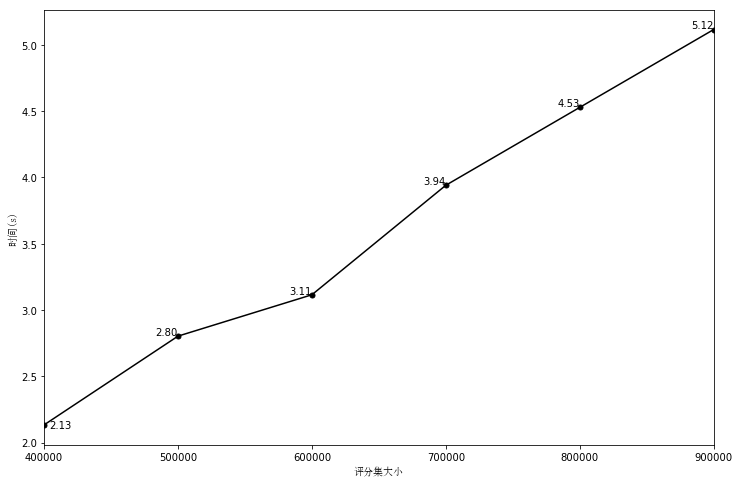

In [24]:
# the old way - data source is in memory
font = font_manager.FontProperties(fname='/home/wsyj/Downloads/simsun.ttc')

values = [x[2] for x in metric]
indexes = [x[1] for x in metric]
labels=["%.2f" % x for x in values]

df = pd.DataFrame( data=values, index=indexes, )


ax = df.plot(legend=False, color=g_color, marker='o', markersize=g_marker_size)
#legend = ax.legend()
#font = font_manager.FontProperties(fname='/home/wsyj/Downloads/simsun.ttc')
#
#for text in legend.texts:
#    text.set_font_properties(font)

#ax.get_legend().set_title('1')


for step, (label, x, y) in enumerate(zip(labels, indexes, values)):
    #plt.annotate(
    #    label,
    #    xy=(x, y), xytext=(-20, 20),
    #    textcoords='offset points', ha='right', va='bottom',
    #    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
    #    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))  # <== fancy annotation
    
    if 0 == step:
        plt.annotate(
            label,
            xy=(x, y),
            xytext=(5, -5),
            textcoords='offset points', ha='left', va='bottom',)
    else:
        plt.annotate(
            label,
            xy=(x, y),
            xytext=(0, -1),
            textcoords='offset points', ha='right', va='bottom',)
    
plt.ylabel(u'时间(s)', fontproperties=font) 
plt.xlabel(u'评分集大小', fontproperties=font)

# setting graph size
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)
plt.show()

In [16]:
for x in _r:
    print x

(1, 400000, 1.9550228118896484, u'2017-04-11 14:04:26')
(2, 500000, 2.674360990524292, u'2017-04-11 14:04:26')
(3, 600000, 3.275067090988159, u'2017-04-11 14:04:26')
(4, 700000, 3.883436918258667, u'2017-04-11 14:04:26')
(5, 800000, 4.268355846405029, u'2017-04-11 14:04:26')
(6, 900000, 4.996531009674072, u'2017-04-11 14:04:26')


In [32]:
# the new way
font = font_manager.FontProperties(fname='/home/wsyj/Downloads/simsun.ttc')

cur.execute("SELECT COUNT(*) FROM sqlite_master where type='table' and name='%s'" % table_name)
_r = cur.fetchall()
if (1 == _r[0][0]): # Store data only when table dosen't exist.
    _r = "select * from %s" % (table_name)
    cur.execute(_r)
    _r = cur.fetchall()

    values = [x[2] for x in _r]
    indexes = [x[1] for x in _r]
    labels=["%.2f" % x for x in values]

    df = pd.DataFrame( data=values, index=indexes, )


    ax = df.plot(legend=False, color=g_color, marker='o', markersize=g_marker_size)
    #legend = ax.legend()
    #font = font_manager.FontProperties(fname='/home/wsyj/Downloads/simsun.ttc')
    #
    #for text in legend.texts:
    #    text.set_font_properties(font)

    #ax.get_legend().set_title('1')


    for step, (label, x, y) in enumerate(zip(labels, indexes, values)):
        #plt.annotate(
        #    label,
        #    xy=(x, y), xytext=(-20, 20),
        #    textcoords='offset points', ha='right', va='bottom',
        #    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        #    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))  # <== fancy annotation

        if 0 == step:
            plt.annotate(
                label,
                xy=(x, y),
                xytext=(5, -5),
                textcoords='offset points', ha='left', va='bottom',)
        else:
            plt.annotate(
                label,
                xy=(x, y),
                xytext=(0, -1),
                textcoords='offset points', ha='right', va='bottom',)
    
    x_label = u'时间(s)'
    y_label = u'评分集大小'
    plt.ylabel(x_label, fontproperties=font) 
    plt.xlabel(y_label, fontproperties=font)

    # setting graph size
    fig = plt.gcf()
    fig.set_size_inches(12, 8, forward=True)
    plt.savefig('fig__X' % (graph_count) + x_label + '__' + y_label + '.png')
    plt.show()
    
else:
    print '[Error]: Table \'%s\' does not exist.' % table_name

NameError: name 'graph_count' is not defined